In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualisation

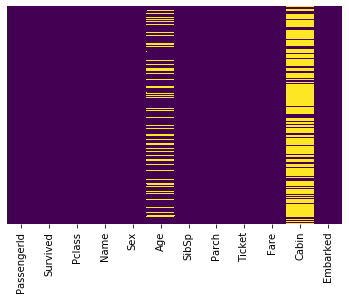

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

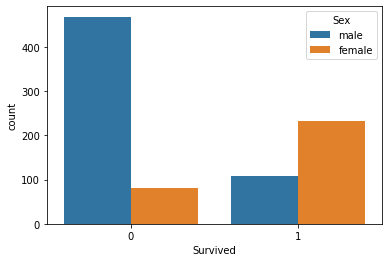

In [5]:
sns.countplot('Survived',hue='Sex',data=data)

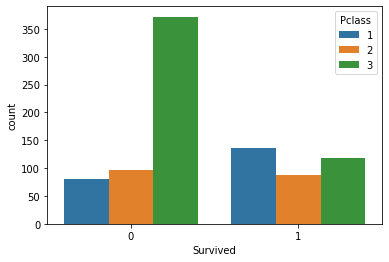

In [6]:
sns.countplot('Survived',hue='Pclass',data=data)

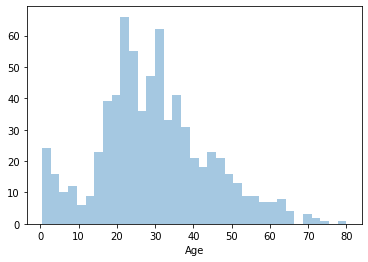

In [7]:
sns.distplot(data['Age'].dropna(),kde=False,bins=35)

# Data cleaning

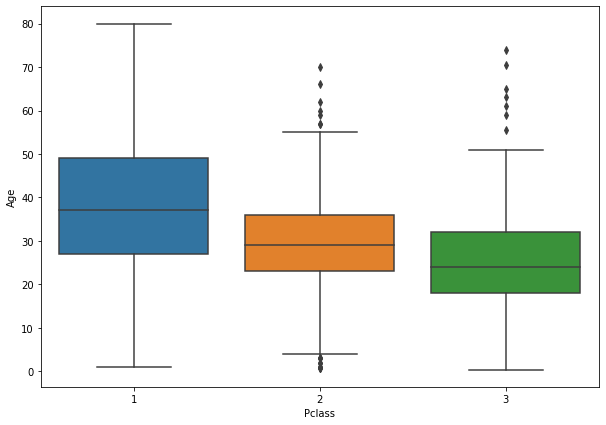

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [9]:
def age_filling(age):
    Age=age[0]
    Pclass=age[1]
    if(pd.isnull(Age)):
        if Pclass==1:
            return 36
        elif Pclass==2:
            return 29
        else:
            return 24
    
    return Age

In [10]:
data['Age']=data[['Age','Pclass']].apply(age_filling,axis=1)

In [11]:
data.drop('Cabin',axis=1,inplace=True)

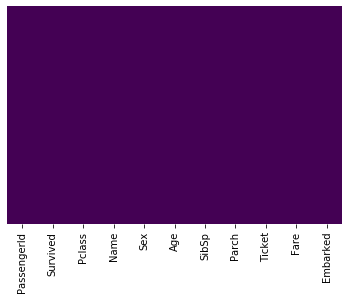

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [15]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)

In [16]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)

In [17]:
data=pd.concat([data,sex,embarked,pclass],axis=1)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [19]:
data.drop(['PassengerId','Name','Sex','Ticket','Embarked','Pclass'],axis=1,inplace=True)


In [20]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# traintestsplit

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

# Model Training And Testing

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)

In [26]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.81      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.81       295

